# **IMPORT LIBRARY**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, RocCurveDisplay, ConfusionMatrixDisplay)

# **MENGHUBUNGKA COLAB DENGAN DRIVE**

In [2]:
from google.colab import drive
drive.mount('/content/grive')

Mounted at /content/grive


# **MEMANGGIL DATASET**

In [3]:
Path = "/content/grive/MyDrive/1.KULIAH/Semester 7/Machine Learning/praktikum04"

# **MEMBACA DATA FILE CSV**

In [4]:
df = pd.read_csv(Path + "/data/calonpembelimobil.csv")
df.head()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              1000 non-null   int64
 1   Usia            1000 non-null   int64
 2   Status          1000 non-null   int64
 3   Kelamin         1000 non-null   int64
 4   Memiliki_Mobil  1000 non-null   int64
 5   Penghasilan     1000 non-null   int64
 6   Beli_Mobil      1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


In [6]:
df.isnull().sum()

,0
ID,0
Usia,0
Status,0
Kelamin,0
Memiliki_Mobil,0
Penghasilan,0
Beli_Mobil,0


In [7]:
df.duplicated().sum()

np.int64(0)

# **ANALISIS KORELASI DATASET**

In [8]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
ID,1.000000,0.149779,-0.006634,0.014646,0.068555,0.254177,0.168614
Usia,0.149779,1.000000,0.051476,0.019454,0.090926,0.125859,0.100127
Status,-0.006634,0.051476,1.000000,-0.008561,0.048302,0.071714,0.048584
Kelamin,0.014646,0.019454,-0.008561,1.000000,0.035199,-0.054211,-0.147301
Memiliki_Mobil,0.068555,0.090926,0.048302,0.035199,1.000000,0.137823,0.102005
Penghasilan,0.254177,0.125859,0.071714,-0.054211,0.137823,1.000000,0.763930
Beli_Mobil,0.168614,0.100127,0.048584,-0.147301,0.102005,0.763930,1.000000


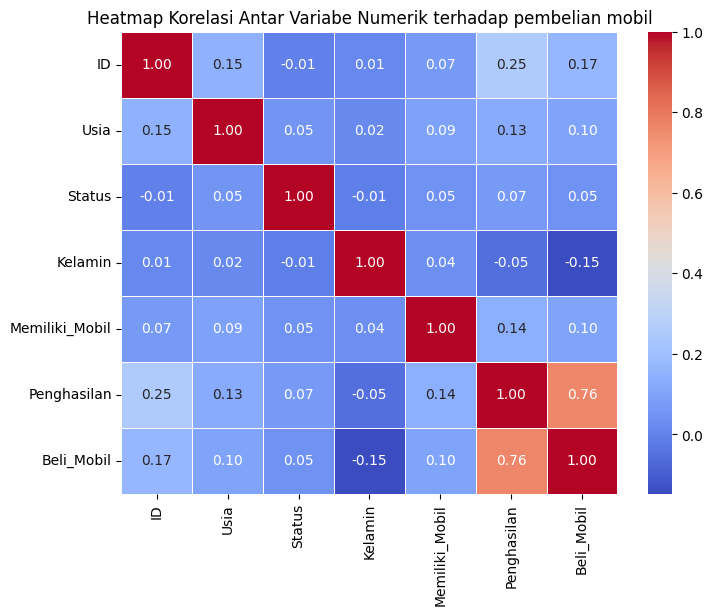

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Variabe Numerik terhadap pembelian mobil", fontsize=12)
plt.show()

# **MENENTUKAN VARIABEL INDEPENDEN (X) DAN DEPENDEN (Y)**

In [11]:
X = df[['Usia', 'Status', 'Kelamin', 'Memiliki_Mobil', 'Penghasilan']]
y = df['Beli_Mobil']

print("Jumlah fitur:", X.shape[1])
print("Jumlah data:", X.shape[0])
print("Target unik:", y.unique())

Jumlah fitur: 5
Jumlah data: 1000
Target unik: [1 0]


# **MEMBAGI DATASET TRAINING DAN TESTING**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,       # 20% untuk pengujian
    random_state=42,     # supaya hasilnya konsisten
    stratify=y           # menjaga proporsi kelas target
)

print("Data latih:", X_train.shape)
print("Data uji:", X_test.shape)

Data latih: (800, 5)
Data uji: (200, 5)


# **MEMBUAT MODEL LOGISTIC REGRESI**

In [13]:
log_model = LogisticRegression(max_iter=1000,
                               random_state=42,
                               solver='lbfgs',
                               class_weight='balanced')

# Melatih model menggunakan data latih
log_model.fit(X_train, y_train)

print("✅ Model Logistic Regression berhasil dilatih!")

✅ Model Logistic Regression berhasil dilatih!


# **PREDIKSI MODEL DAN EVALUASI MODEL**

In [14]:
y_pred = log_model.predict(X_test)               # Prediksi kelas
y_prob = log_model.predict_proba(X_test)[:, 1]   # Probabilitas kelas positif (1)

# Hitung metrik evaluasi
print(f"Akurasi       : {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision     : {precision_score(y_test, y_pred, zero_division=0):.4f}")
print(f"Recall        : {recall_score(y_test, y_pred, zero_division=0):.4f}")
print(f"F1 Score      : {f1_score(y_test, y_pred, zero_division=0):.4f}")
print(f"ROC AUC Score : {roc_auc_score(y_test, y_prob):.4f}")

Akurasi       : 0.9300
Precision     : 0.9748
Recall        : 0.9134
F1 Score      : 0.9431
ROC AUC Score : 0.9773


# **VISUALISASI HASIL EVALUASI**

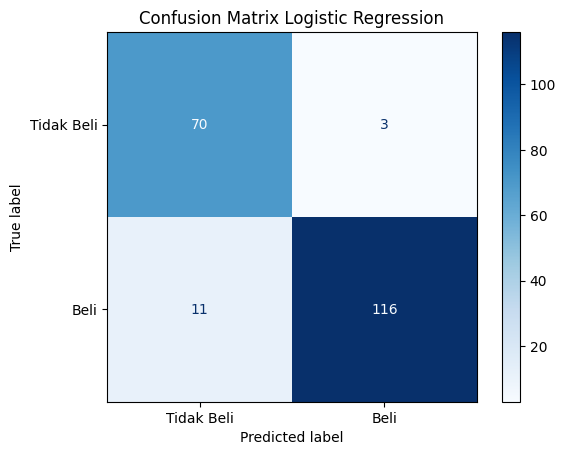

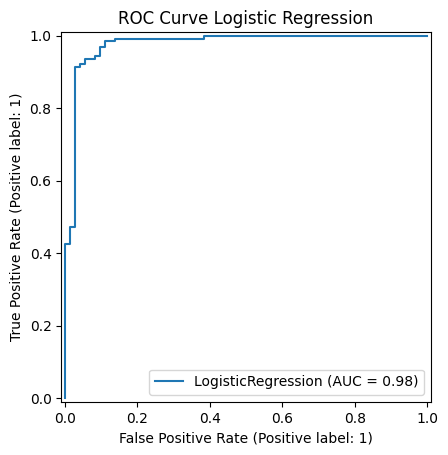

In [15]:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['Tidak Beli', 'Beli']
).plot(values_format='d', cmap='Blues')

plt.title("Confusion Matrix Logistic Regression")
plt.show()

# --- ROC Curve ---
RocCurveDisplay.from_estimator(log_model, X_test, y_test)
plt.title("ROC Curve Logistic Regression")
plt.show()

# **CLASSIFICATION REPORT**

In [16]:
from sklearn.metrics import classification_report

# Tampilkan hasil evaluasi per kelas
print(classification_report(y_test, y_pred, target_names=['Tidak Beli (0)', 'Beli (1)']))

                precision    recall  f1-score   support

Tidak Beli (0)       0.86      0.96      0.91        73
      Beli (1)       0.97      0.91      0.94       127

      accuracy                           0.93       200
     macro avg       0.92      0.94      0.93       200
  weighted avg       0.93      0.93      0.93       200



In [17]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(log_model, X, y, cv=5)

print("Skor tiap fold:", scores)
print("Rata-rata akurasi:", np.mean(scores))
print("Standar deviasi:", np.std(scores))

Skor tiap fold: [0.785 0.91  0.955 0.945 0.94 ]
Rata-rata akurasi: 0.907
Standar deviasi: 0.06281719509815761


# **INTERPRETASI MODEL MODEL LOGISTIC REGRESSION**

In [18]:
feat_names = X.columns
coefs = log_model.coef_[0]
odds = np.exp(coefs)

coef_df = pd.DataFrame({
    'Fitur': feat_names,
    'Koefisien (log-odds)': coefs,
    'Odds Ratio (e^coef)': odds
}).sort_values(by='Odds Ratio (e^coef)', ascending=False)

display(coef_df)

,Fitur,Koefisien (log-odds),Odds Ratio (e^coef)
3,Memiliki_Mobil,0.101041,1.106322
4,Penghasilan,0.055669,1.057248
0,Usia,-0.006847,0.993176
1,Status,-0.158049,0.853808
2,Kelamin,-1.230918,0.292024


# **PREDIKSI DATA BARU**

In [19]:
# Buat dataset baru untuk pengujian model
data_baru = pd.DataFrame({
    'Usia': [25, 40, 55],
    'Status': [1, 2, 3],
    'Kelamin': [0, 1, 0],
    'Memiliki_Mobil': [0, 1, 2],
    'Penghasilan': [150, 250, 300]
})

pred = log_model.predict(data_baru)
prob = log_model.predict_proba(data_baru)[:, 1]

hasil = data_baru.copy()
hasil['Prop_Stunting'] = prob
hasil['Pred (0=Tidak, 1=Ya)'] = pred
display(hasil)

,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Prop_Stunting,"Pred (0=Tidak, 1=Ya)"
0,25,1,0,0,150,0.023400,0
1,40,2,1,1,250,0.609435,1
2,55,3,0,2,300,0.986608,1
